In [1]:
import os
import pandas as pd
import janitor
from utilities import (
    check_make_dir,
    coverage_mthyr,
    save_mpl_fig,
)
check_make_dir('../data', '../figures')
FP = '../data/data_coverage.csv'

In [2]:
# (fold cell) Read & prep data from lf and save
if False:
    LF_FP = '../../readable_news_lf/toi_parsed_all.csv.gz'
    
    df = (pd.read_csv(LF_FP, usecols=['NumericPubDate'])
          .clean_names()
          .assign(date=lambda df: pd.to_datetime(df.numericpubdate, format='%Y%m%d'))
          .set_index('date').groupby(pd.Grouper(freq='M')).size().reset_index()
          .rename(columns={0: 'count'})
          .assign(month=lambda df: [dt64.month_name()[:3] for dt64 in df.date],
                  monthix=lambda df: [dt64.month for dt64 in df.date],
                  year=lambda df: [dt64.year for dt64 in df.date])
          .pivot(['month', 'monthix'], 'year', 'count')
          .sort_values('monthix').droplevel('monthix')
         )
    df.to_csv(FP)    
df = pd.read_csv(FP, index_col='month')
df.head(3)

,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
month,,,,,,,,,,,,,,,,,,,,,
Jan,NaN,563.0,496.0,309.0,491.0,0.0,434.0,432.0,439.0,555.0,...,9477.0,10011.0,9346.0,8829.0,9016.0,8384.0,8517.0,11497.0,10670.0,11813.0
Feb,NaN,488.0,496.0,521.0,461.0,0.0,400.0,422.0,396.0,549.0,...,8455.0,10230.0,9086.0,8705.0,8648.0,8164.0,8485.0,10512.0,10312.0,11409.0
Mar,NaN,525.0,418.0,564.0,534.0,0.0,489.0,489.0,390.0,590.0,...,9992.0,11034.0,9355.0,9181.0,9692.0,8712.0,9474.0,10951.0,12000.0,11678.0


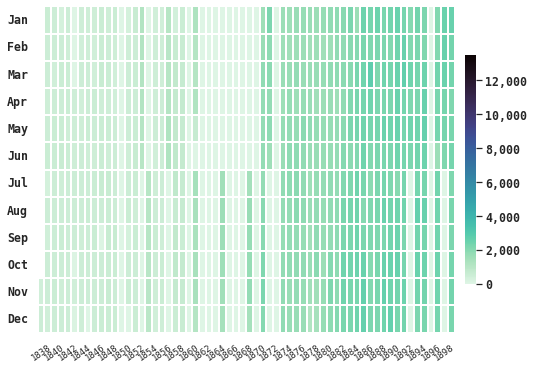

In [3]:
heatmap_kwargs = {'vmax':df.max().max(), 'vmin': 0}
coverage_mthyr(df[[str(yr) for yr in range(1838, 1900)]], xtickangle=35, **heatmap_kwargs)
save_mpl_fig('../figures/data_coverage1838to1899')

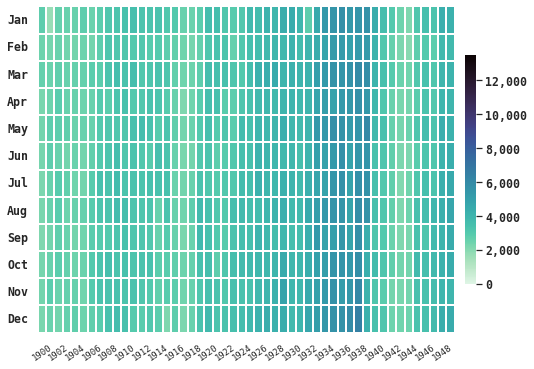

In [4]:
coverage_mthyr(df[[str(yr) for yr in range(1900, 1950)]], xtickangle=35, **heatmap_kwargs)
save_mpl_fig('../figures/data_coverage1900to1949')

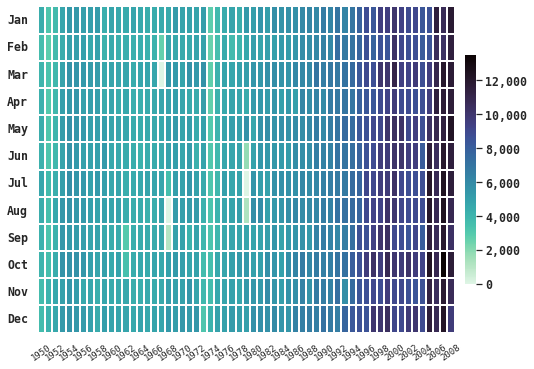

In [5]:
coverage_mthyr(df[[str(yr) for yr in range(1950, 2009)]], xtickangle=35, **heatmap_kwargs)
save_mpl_fig('../figures/data_coverage1950to2008')